In [36]:
from datasets import load_dataset_builder, load_dataset, get_dataset_infos
import os
import datasets as ds

from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
import numpy as np

In [37]:
name = "blanchon/EuroSAT_RGB"

In [38]:
train_ds = ds.load_dataset(name, split="train", cache_dir = os.environ['PSCRATCH']).with_format("torch", device='cuda')
val_ds = ds.load_dataset(name, split="validation", cache_dir = os.environ['PSCRATCH']).with_format("torch", device='cuda')
test_ds = ds.load_dataset(name, split="test", cache_dir = os.environ['PSCRATCH']).with_format("torch", device='cuda')

In [41]:
train_dl = DataLoader(train_ds, batch_size=32, shuffle=True)

In [42]:
for batch in train_dl:
    print(batch['image'].shape)
    break

torch.Size([32, 3, 64, 64])


In [48]:
axes

array([<Axes: >, <Axes: >, <Axes: >], dtype=object)

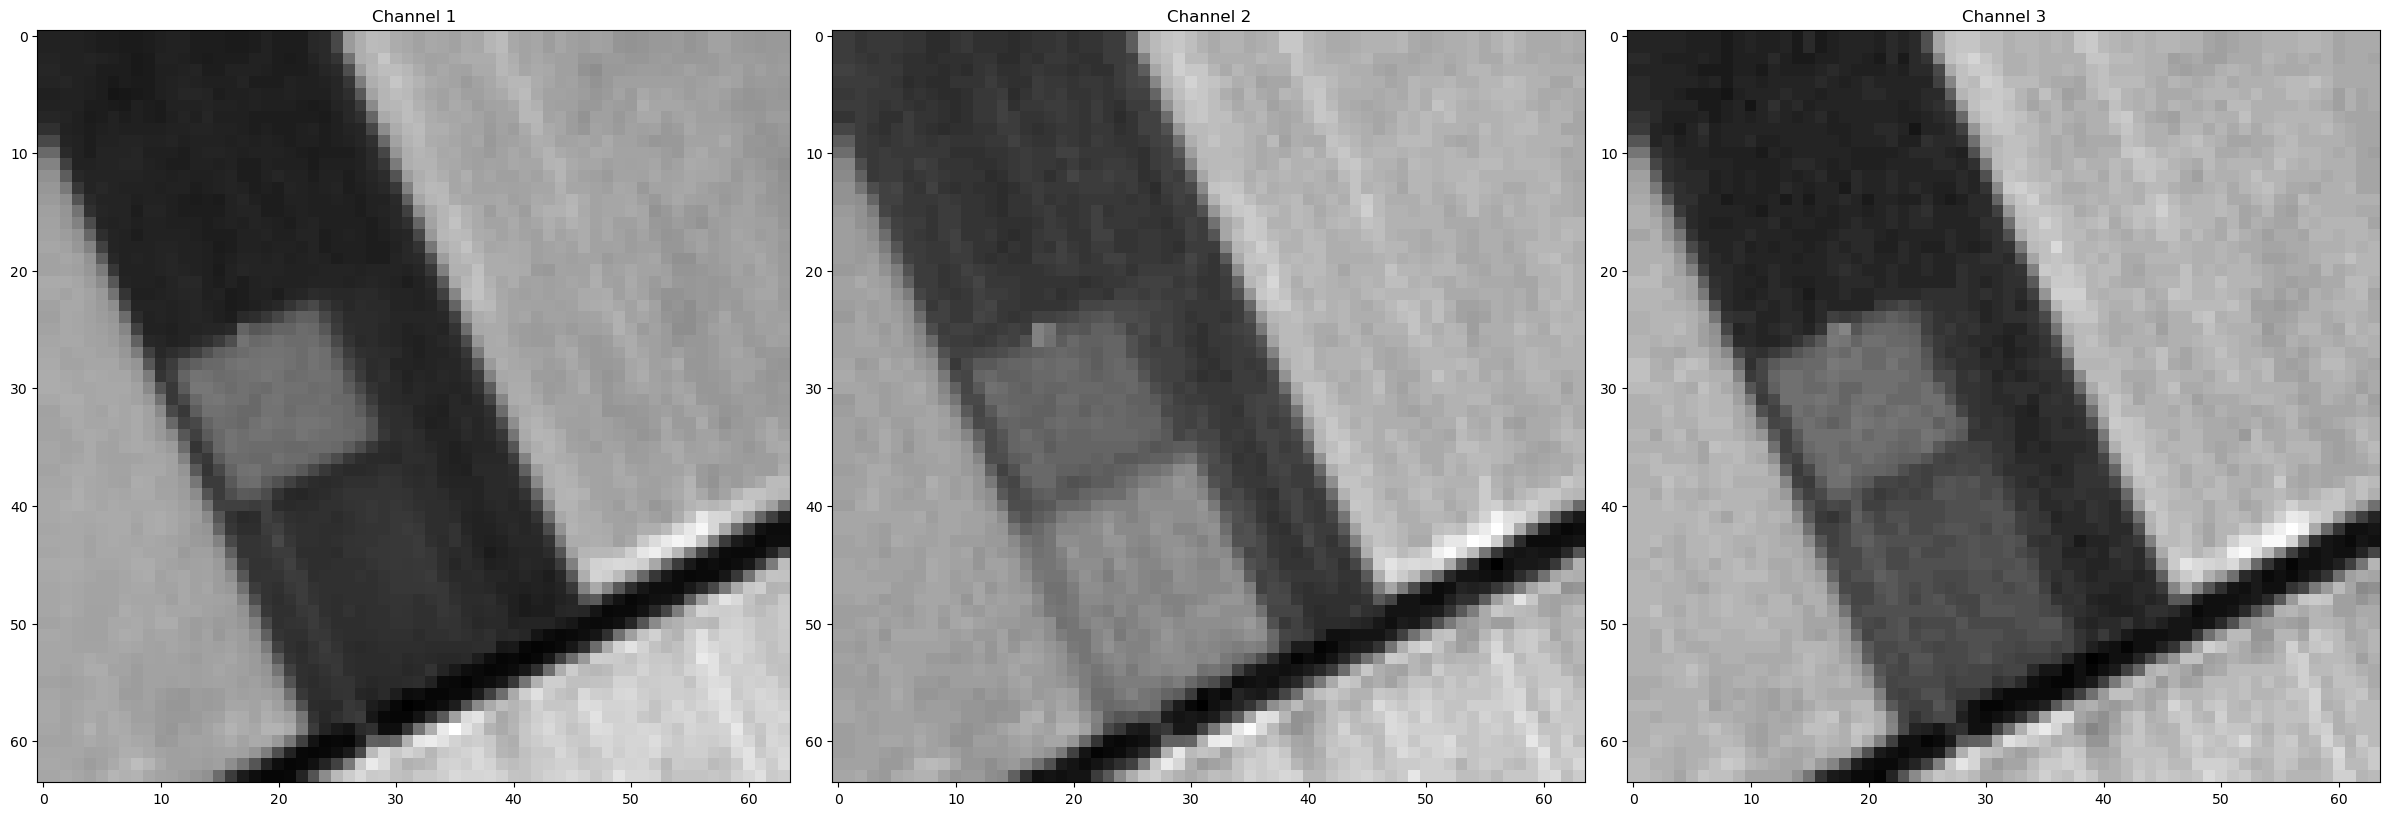

In [49]:
image = train_ds[10]['image']
ax_size = 8
n_col = 3
n_row = image.shape[0] // n_col 
if image.shape[0] % n_col != 0:
    n_row += 1

fig, axes = plt.subplots(n_row, n_col, figsize = (n_col * ax_size, n_row * ax_size ))

for i in range(image.shape[0]):
    layer = image[i].cpu().numpy()
    row = i // n_col
    col = i % n_col
    ax = axes[row][col] if n_row > 1 else axes[col]
    ax.imshow(layer, cmap='gray')
    ax.set_title(f"Channel {i+1}")
    

plt.tight_layout()
plt.show()